# 서포트 벡터 머신(Support Vector Machines)
* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트벡터라고 함
* 각 서포트벡터가 클래스 사이의 결정경계를 구분하는데 얼마나 중요한지를 학습
* 각 서포트벡터 사이의 마진이 가장 큰 방향으로 학습
* 서포트벡터까지의 거리와 서포트벡터의 중요도를 기반으로 예측을 수행

In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes, load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀모델(SVR)

In [3]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

model = SVR()
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.2177283706374875
평가 데이터 점수: 0.13544178468518187


### SVM을 사용한 분류모델(SVC)

In [4]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

model = SVC()
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


### 커널 기법
* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

In [5]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linear_svr = SVR(kernel = 'linear')
linear_svr.fit(X_train, y_train)

print('Linear SVR 학습 데이터 점수: {}'.format(linear_svr.score(X_train, y_train)))
print('Linear SVR 평가 데이터 점수: {}'.format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel = 'poly')
polynomial_svr.fit(X_train, y_train)

print('polynomial SVR 학습 데이터 점수: {}'.format(polynomial_svr.score(X_train, y_train)))
print('polynomial SVR 평가 데이터 점수: {}'.format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel = 'rbf')
rbf_svr.fit(X_train, y_train)

print('rbf SVR 학습 데이터 점수: {}'.format(rbf_svr.score(X_train, y_train)))
print('rbf SVR 평가 데이터 점수: {}'.format(rbf_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 점수: 0.715506620496448
Linear SVR 평가 데이터 점수: 0.6380398541506058
polynomial SVR 학습 데이터 점수: 0.2024454261446289
polynomial SVR 평가 데이터 점수: 0.133668450367462
rbf SVR 학습 데이터 점수: 0.2177283706374875
rbf SVR 평가 데이터 점수: 0.13544178468518187


In [6]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linear_svc = SVC(kernel = 'linear')
linear_svc.fit(X_train, y_train)

print('Linear SVC 학습 데이터 점수: {}'.format(linear_svc.score(X_train, y_train)))
print('Linear SVC 평가 데이터 점수: {}'.format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel = 'poly')
polynomial_svc.fit(X_train, y_train)

print('Polynomial SVC 학습 데이터 점수: {}'.format(polynomial_svc.score(X_train, y_train)))
print('Polynomial SVC 평가 데이터 점수: {}'.format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel = 'rbf')
rbf_svc.fit(X_train, y_train)

print('RBF SVC 학습 데이터 점수: {}'.format(rbf_svc.score(X_train, y_train)))
print('RBF SVC 평가 데이터 점수: {}'.format(rbf_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 점수: 0.960093896713615
Linear SVC 평가 데이터 점수: 0.986013986013986
Polynomial SVC 학습 데이터 점수: 0.9014084507042254
Polynomial SVC 평가 데이터 점수: 0.9230769230769231
RBF SVC 학습 데이터 점수: 0.9014084507042254
RBF SVC 평가 데이터 점수: 0.9230769230769231


### 매개변수 튜닝
    * SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
    * 매개변수를 변경하면서 성능변화를 관찰

In [7]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [8]:
polynomial_svc = SVC(kernel = 'poly', degree = 2, gamma = 'auto', C = 0.1)
polynomial_svc.fit(X_train, y_train)

print('kernel = poly, degree ={}, C = {}, gamma = {}'.format(2, 0.1, 'auto'))
print('Polynomial SVC 학습 데이터 점수: {}'.format(polynomial_svc.score(X_train, y_train)))
print('Polynomial SVC 평가 데이터 점수: {}'.format(polynomial_svc.score(X_test, y_test)))

kernel = poly, degree =2, C = 0.1, gamma = auto
Polynomial SVC 학습 데이터 점수: 0.9835680751173709
Polynomial SVC 평가 데이터 점수: 0.993006993006993


In [9]:
rbf_svc = SVC(kernel = 'rbf', C = 1.5, gamma = 'scale')
rbf_svc.fit(X_train, y_train)

print('kernel = rbf, C = {}, gamma = {}'.format(2.0, 'scale'))
print('RBF SVC 학습 데이터 점수: {}'.format(rbf_svc.score(X_train, y_train)))
print('RBF SVC 평가 데이터 점수: {}'.format(rbf_svc.score(X_test, y_test)))

kernel = rbf, C = 2.0, gamma = scale
RBF SVC 학습 데이터 점수: 0.9061032863849765
RBF SVC 평가 데이터 점수: 0.9370629370629371


## 데이터 전처리
    * SVM은 입력 데이터가 정규화되어야 좋은 성능을 보임
    * 주로 모든 특성 값을 [0,1] 범위로 맞추는 방법을 사용
    * scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [10]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [11]:
model = SVC().fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9014084507042254
SVC 평가 데이터 점수: 0.9230769230769231


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
model = SVC().fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9835680751173709
SVC 평가 데이터 점수: 0.986013986013986


In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
model = SVC().fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9812206572769953
SVC 평가 데이터 점수: 0.9300699300699301


## Linear SVR

### 보스턴 주택 가격

In [16]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [17]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [19]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7033808196599043
평가 데이터 점수: 0.7770815280896015


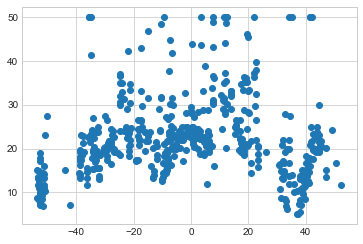

In [20]:
# 저차원 변화를 한 후, 시각화
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)

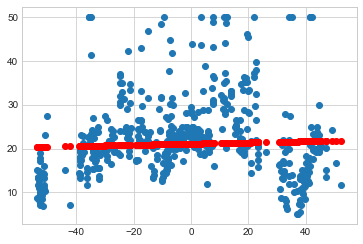

In [21]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, c='r')

In [22]:
# pipeline으로 cross-validate 만들기
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(estimator = estimator, 
               X=X, y=y, 
               cv=5, 
               n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    1.8s finished


{'fit_time': array([0.01468492, 0.01296401, 0.01567864, 0.01695204, 0.01667571]),
 'score_time': array([0.00199032, 0.00199413, 0.00199461, 0.00299191, 0.00099707]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [23]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C': [1.0, 0.1, 0.01],
              'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator = pipe, param_grid=param_grid, 
                 n_jobs = multiprocessing.cpu_count(),
                 cv = 5,
                 verbose = True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [24]:
print(gs.best_estimator_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])
0.49854468515517


### 당뇨병

In [25]:
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [26]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [28]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.5254654089380814
평가 데이터 점수: 0.42141746862797713


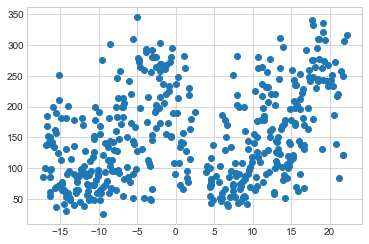

In [29]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)

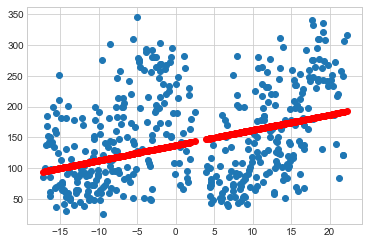

In [30]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, c='r')

In [31]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(estimator = estimator, 
               X=X, y=y, 
               cv=5, 
               n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01277852, 0.01078486, 0.00881791, 0.01078296, 0.01178861]),
 'score_time': array([0.00398993, 0.00299883, 0.00096703, 0.00299382, 0.00198913]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [32]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C': [1.0, 0.1, 0.01],
              'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator = pipe, param_grid=param_grid, 
                 n_jobs = multiprocessing.cpu_count(),
                 cv = 5,
                 verbose = True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [33]:
print(gs.best_estimator_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])
0.4780769992158147


## Kernel SVR

### 보스턴 주택 가격

In [34]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [35]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
model = SVR(kernel = 'rbf').fit(X_train, y_train)

In [37]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6867573745555529
평가 데이터 점수: 0.6104009638202494


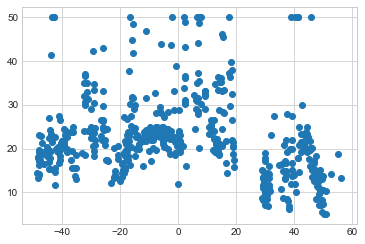

In [38]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)

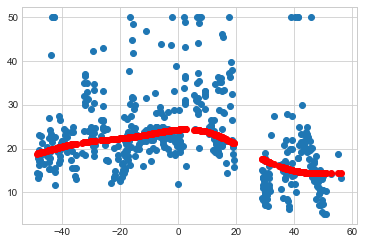

In [39]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, c='r')

In [46]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(estimator = estimator, 
               X=X, y=y, 
               cv=5, 
               n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01151252, 0.01746702, 0.0129602 , 0.01096773, 0.01794982]),
 'score_time': array([0.00798011, 0.0089767 , 0.00498796, 0.00498676, 0.0079782 ]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [43]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator = pipe, 
                 param_grid=param_grid, 
                 n_jobs = multiprocessing.cpu_count(),
                 cv = 5,
                 verbose = True)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.17631266        nan 0.14981591]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=12,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [45]:
print(gs.best_estimator_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])
0.17631266230186618


In [48]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'sigmoid'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C': [1.0, 0.1, 0.01],
              'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator = pipe, param_grid=param_grid, 
                 n_jobs = multiprocessing.cpu_count(),
                 cv = 5,
                 verbose = True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [49]:
print(gs.best_estimator_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=0.01, kernel='sigmoid'))])
0.19838488459876577


In [52]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=0.01, kernel='sigmoid'))])

In [53]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.4198634971261612
평가 데이터 점수: 0.41197396871329905


## Linear SVC

    * 유방암

In [54]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [55]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [56]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.989010989010989
평가 데이터 점수: 0.9824561403508771


In [58]:
# 시각화를 위한 코드 추가

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    return xx, yy

In [63]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [64]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

In [67]:
from matplotlib import cm

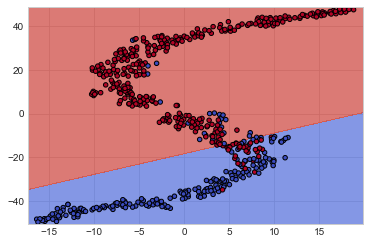

In [68]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = .7)
plt.scatter(X0, X1, c=y, cmap = cm.coolwarm, s = 20, edgecolors='k')

In [71]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(estimator = estimator, 
               X=X, y=y, 
               cv=5, 
               n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00598502, 0.00398898, 0.00498676, 0.00398874, 0.00598216]),
 'score_time': array([0.0009973 , 0.00099778, 0.0009973 , 0.0009973 , 0.00099754]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [72]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator = pipe, param_grid=param_grid, 
                 n_jobs = multiprocessing.cpu_count(),
                 cv = 5,
                 verbose = True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [73]:
print(gs.best_estimator_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
0.9736531594472908


### 붗꽃

In [78]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [79]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [80]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [81]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9


In [82]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

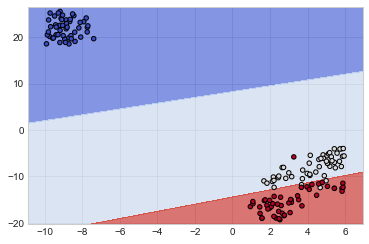

In [83]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = .7)
plt.scatter(X0, X1, c=y, cmap = cm.coolwarm, s = 20, edgecolors='k')

In [84]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(estimator = estimator, 
               X=X, y=y, 
               cv=5, 
               n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00195789, 0.00096631, 0.00196385, 0.00099754, 0.00099707]),
 'score_time': array([0.00099754, 0.00099754, 0.        , 0.00099707, 0.0010376 ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [87]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator = pipe, param_grid=param_grid, 
                 n_jobs = multiprocessing.cpu_count(),
                 cv = 5,
                 verbose = True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [90]:
print(gs.best_estimator_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])
0.9666666666666668


## 와인

In [91]:
X, y = load_wine(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [92]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [93]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [94]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9722222222222222


In [95]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

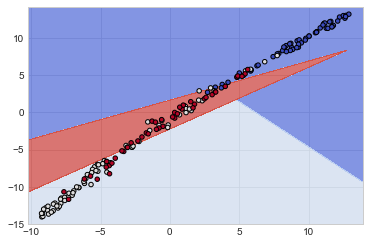

In [96]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = .7)
plt.scatter(X0, X1, c=y, cmap = cm.coolwarm, s = 20, edgecolors='k')

In [97]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(estimator = estimator, 
               X=X, y=y, 
               cv=5, 
               n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099826, 0.00199413, 0.00199413, 0.0019927 , 0.00299382]),
 'score_time': array([0.00099587, 0.        , 0.00099683, 0.        , 0.        ]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [98]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator = pipe, param_grid=param_grid, 
                 n_jobs = multiprocessing.cpu_count(),
                 cv = 5,
                 verbose = True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [99]:
print(gs.best_estimator_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
0.972063492063492


## Kernel SVC

In [100]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [101]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [102]:
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [103]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.989010989010989
평가 데이터 점수: 0.9824561403508771


In [104]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

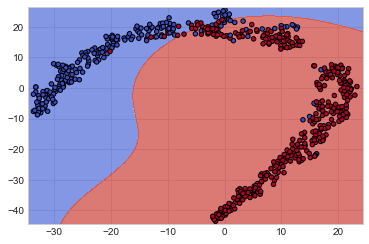

In [105]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = .7)
plt.scatter(X0, X1, c=y, cmap = cm.coolwarm, s = 20, edgecolors='k')

In [106]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(estimator = estimator, 
               X=X, y=y, 
               cv=5, 
               n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00641108, 0.00797892, 0.00897312, 0.00797915, 0.0079782 ]),
 'score_time': array([0.0009973 , 0.00199723, 0.00199485, 0.0009973 , 0.00099683]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [107]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
              'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator = pipe, param_grid=param_grid, 
                 n_jobs = multiprocessing.cpu_count(),
                 cv = 5,
                 verbose = True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [108]:
print(gs.best_estimator_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
0.9736531594472908
